In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
bias_list = np.genfromtxt('bias.list', dtype=str)

In [3]:
print(bias_list)

['AF702431.fits' 'AF702432.fits' 'AF702433.fits' 'AF702434.fits'
 'AF702435.fits' 'AF702436.fits' 'AF702437.fits' 'AF702438.fits'
 'AF702439.fits' 'AF702440.fits' 'AF702441.fits' 'AF702442.fits'
 'AF702443.fits' 'AF702444.fits' 'AF702445.fits' 'AF702446.fits'
 'AF702447.fits' 'AF702448.fits' 'AF702449.fits' 'AF702450.fits'
 'AF702451.fits' 'AF702452.fits' 'AF702453.fits' 'AF702454.fits'
 'AF702455.fits' 'AF702456.fits' 'AF702457.fits' 'AF702458.fits'
 'AF702459.fits' 'AF702460.fits']


In [4]:
from astropy.io import fits

In [5]:
bias_fits = fits.open(bias_list[0])
print(bias_fits)

In [6]:
bias_fits[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  521 / length of data axis 1                          
NAXIS2  =                  132 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2021-09-10T01:51:10' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'AF702431.fits'      / Original file name                             
TIMESYS = 'UTC     '        

In [7]:
gain = bias_fits[0].header['GAIN']
airmass = bias_fits[0].header['AIRMASS']
readout_noise = bias_fits[0].header['RDNOISE']
print(gain, airmass, readout_noise)

1.91 1.431 7.1


In [8]:
bias_fits[0].data
print(np.shape(bias_fits[0].data))
data = bias_fits[0].data * gain

(132, 521)


<IPython.core.display.Javascript object>


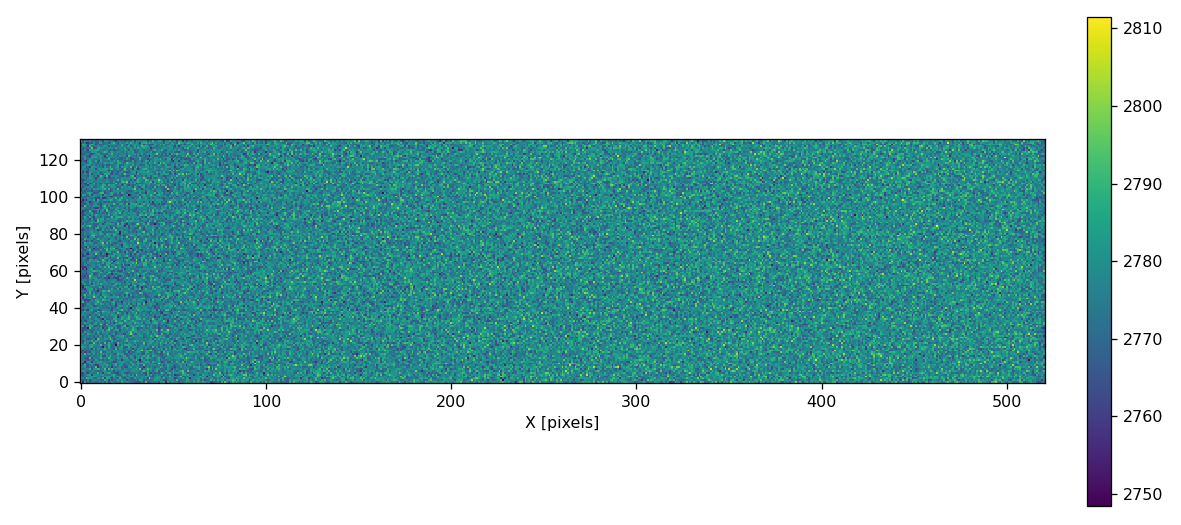

In [10]:
plt.figure(figsize=(9,4), tight_layout=True)
im = plt.imshow(data, cmap='viridis', interpolation='none', origin='lower')
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.colorbar(im, fraction=0.046, pad=0.04)

In [11]:
n_image = len(bias_list)
x_shape, y_shape = np.shape(data)
print(n_image, x_shape, y_shape)

30 132 521


In [12]:
stack = np.empty([n_image, x_shape, y_shape])

In [13]:
for i_bias, bias_name in enumerate(bias_list):
    bias_temp = fits.open(bias_name)
    stack[i_bias,:,:] = bias_temp[0].data * gain
    bias_temp.close()

In [14]:
print(stack)

[[[2779.05 2756.13 2784.78 ... 2765.68 2775.23 2775.23]
  [2773.32 2763.77 2771.41 ... 2775.23 2759.95 2773.32]
  [2780.96 2779.05 2767.59 ... 2779.05 2786.69 2773.32]
  ...
  [2761.86 2769.5  2773.32 ... 2784.78 2767.59 2771.41]
  [2784.78 2763.77 2779.05 ... 2779.05 2773.32 2769.5 ]
  [2779.05 2780.96 2765.68 ... 2775.23 2773.32 2773.32]]

 [[2780.96 2744.67 2769.5  ... 2773.32 2786.69 2782.87]
  [2782.87 2758.04 2792.42 ... 2773.32 2779.05 2779.05]
  [2779.05 2767.59 2775.23 ... 2759.95 2784.78 2777.14]
  ...
  [2784.78 2777.14 2767.59 ... 2777.14 2794.33 2763.77]
  [2779.05 2771.41 2775.23 ... 2773.32 2775.23 2773.32]
  [2773.32 2769.5  2773.32 ... 2759.95 2775.23 2777.14]]

 [[2782.87 2773.32 2792.42 ... 2779.05 2779.05 2771.41]
  [2771.41 2765.68 2765.68 ... 2777.14 2782.87 2763.77]
  [2771.41 2769.5  2779.05 ... 2786.69 2779.05 2780.96]
  ...
  [2777.14 2759.95 2779.05 ... 2771.41 2779.05 2784.78]
  [2779.05 2773.32 2763.77 ... 2786.69 2782.87 2780.96]
  [2775.23 2773.32 2779.05

In [15]:
median_bias = np.median(stack, axis=0)
np.shape(median_bias)

(132, 521)

<IPython.core.display.Javascript object>


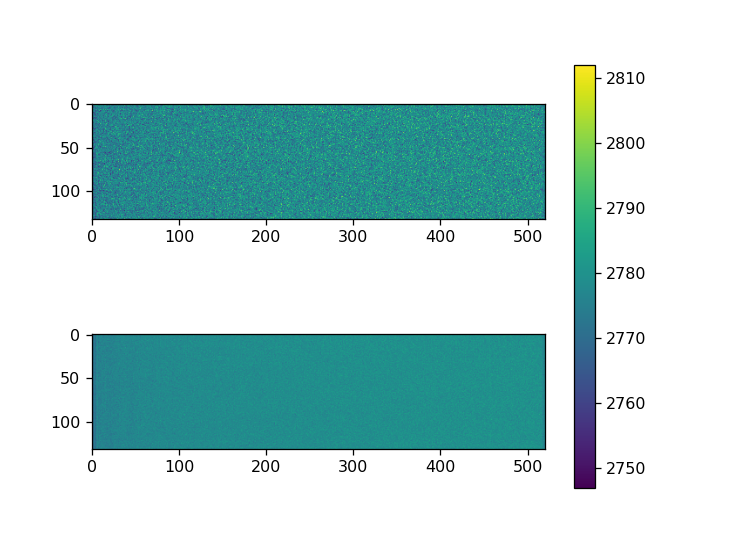

In [16]:
fig, ax = plt.subplots(2,1)
im1 = ax[0].imshow(data, vmin=2747, vmax=2812)
im2 = ax[1].imshow(median_bias, vmin=2747, vmax=2812)
fig.colorbar(im1, ax=ax)

In [17]:
print('STD of a single bias: ', np.std(data[:,100:500])) #in case of an overscan, skip the first 100 pixels on the left. 
print('readout noise: ', readout_noise)
print('expected STD of median bias: ', np.std(data[:,100:500])/np.sqrt(n_image))
print('expected noise of median bias: ', readout_noise/np.sqrt(n_image))
print('measured STD of median bias: ', np.std(median_bias[:,100:500]))
#In the unit of electrons.

STD of a single bias:  7.879237681458989
readout noise:  7.1
expected STD of median bias:  1.4385454046932642
expected noise of median bias:  1.296276719428893
measured STD of median bias:  1.8919885899451057


In [18]:
import pickle
pickle.dump(median_bias, open('median_bias.p', 'wb'))

In [19]:
favourite_median = pickle.load(open('median_bias.p', 'rb'))
print(favourite_median)

[[2776.185 2768.545 2776.185 ... 2777.14  2775.23  2775.23 ]
 [2773.32  2767.59  2773.32  ... 2775.23  2775.23  2776.185]
 [2776.185 2767.59  2775.23  ... 2776.185 2780.005 2777.14 ]
 ...
 [2776.185 2769.5   2773.32  ... 2776.185 2777.14  2777.14 ]
 [2777.14  2767.59  2776.185 ... 2778.095 2777.14  2777.14 ]
 [2775.23  2765.68  2777.14  ... 2775.23  2777.14  2777.14 ]]
